## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9862451	total: 47.3ms	remaining: 47.2s
1:	learn: 0.9668808	total: 48.1ms	remaining: 24s
2:	learn: 0.9444636	total: 48.9ms	remaining: 16.2s
3:	learn: 0.9248562	total: 49.8ms	remaining: 12.4s
4:	learn: 0.9067899	total: 50.6ms	remaining: 10.1s
5:	learn: 0.8886634	total: 51.4ms	remaining: 8.52s
6:	learn: 0.8729156	total: 52.4ms	remaining: 7.44s
7:	learn: 0.8556081	total: 53.4ms	remaining: 6.62s
8:	learn: 0.8403905	total: 54.2ms	remaining: 5.97s
9:	learn: 0.8225864	total: 55.1ms	remaining: 5.45s
10:	learn: 0.8075638	total: 56ms	remaining: 5.03s
11:	learn: 0.7915633	total: 56.8ms	remaining: 4.67s
12:	learn: 0.7754608	total: 57.6ms	remaining: 4.37s
13:	learn: 0.7598084	total: 58.5ms	remaining: 4.12s
14:	learn: 0.7478941	total: 59.4ms	remaining: 3.9s
15:	learn: 0.7348609	total: 60.3ms	remaining: 3.71s
16:	learn: 0.7216930	total: 61.2ms	remaining: 3.54s
17:	learn: 0.7086731	total: 62ms	remaining: 3.38s
18:	learn: 0.6959573	total: 62.8ms	remaining: 3.24s


117:	learn: 0.2794165	total: 146ms	remaining: 1.09s
118:	learn: 0.2782882	total: 147ms	remaining: 1.09s
119:	learn: 0.2775219	total: 148ms	remaining: 1.09s
120:	learn: 0.2760244	total: 149ms	remaining: 1.08s
121:	learn: 0.2753355	total: 151ms	remaining: 1.08s
122:	learn: 0.2746020	total: 152ms	remaining: 1.08s
123:	learn: 0.2735049	total: 152ms	remaining: 1.08s
124:	learn: 0.2727279	total: 153ms	remaining: 1.07s
125:	learn: 0.2716976	total: 154ms	remaining: 1.07s
126:	learn: 0.2702473	total: 155ms	remaining: 1.07s
127:	learn: 0.2692887	total: 156ms	remaining: 1.06s
128:	learn: 0.2680385	total: 157ms	remaining: 1.06s
129:	learn: 0.2664568	total: 158ms	remaining: 1.06s
130:	learn: 0.2656042	total: 159ms	remaining: 1.05s
131:	learn: 0.2644250	total: 160ms	remaining: 1.05s
132:	learn: 0.2632778	total: 161ms	remaining: 1.05s
133:	learn: 0.2626547	total: 162ms	remaining: 1.04s
134:	learn: 0.2610599	total: 162ms	remaining: 1.04s
135:	learn: 0.2597339	total: 163ms	remaining: 1.04s
136:	learn: 

275:	learn: 0.1747704	total: 281ms	remaining: 737ms
276:	learn: 0.1743705	total: 282ms	remaining: 736ms
277:	learn: 0.1738482	total: 283ms	remaining: 735ms
278:	learn: 0.1736553	total: 284ms	remaining: 734ms
279:	learn: 0.1733256	total: 285ms	remaining: 732ms
280:	learn: 0.1729271	total: 285ms	remaining: 731ms
281:	learn: 0.1724977	total: 286ms	remaining: 729ms
282:	learn: 0.1720293	total: 287ms	remaining: 728ms
283:	learn: 0.1715560	total: 288ms	remaining: 726ms
284:	learn: 0.1711108	total: 289ms	remaining: 725ms
285:	learn: 0.1705763	total: 290ms	remaining: 723ms
286:	learn: 0.1701456	total: 291ms	remaining: 722ms
287:	learn: 0.1698627	total: 291ms	remaining: 720ms
288:	learn: 0.1695405	total: 292ms	remaining: 719ms
289:	learn: 0.1689439	total: 293ms	remaining: 717ms
290:	learn: 0.1686439	total: 294ms	remaining: 716ms
291:	learn: 0.1682562	total: 295ms	remaining: 714ms
292:	learn: 0.1680472	total: 296ms	remaining: 713ms
293:	learn: 0.1677935	total: 296ms	remaining: 712ms
294:	learn: 

439:	learn: 0.1240907	total: 416ms	remaining: 529ms
440:	learn: 0.1237583	total: 418ms	remaining: 530ms
441:	learn: 0.1234460	total: 419ms	remaining: 529ms
442:	learn: 0.1233805	total: 420ms	remaining: 528ms
443:	learn: 0.1231213	total: 421ms	remaining: 527ms
444:	learn: 0.1229701	total: 421ms	remaining: 526ms
445:	learn: 0.1229407	total: 422ms	remaining: 524ms
446:	learn: 0.1227788	total: 423ms	remaining: 523ms
447:	learn: 0.1226554	total: 424ms	remaining: 522ms
448:	learn: 0.1223314	total: 425ms	remaining: 521ms
449:	learn: 0.1221107	total: 425ms	remaining: 520ms
450:	learn: 0.1218218	total: 426ms	remaining: 519ms
451:	learn: 0.1215528	total: 427ms	remaining: 518ms
452:	learn: 0.1215064	total: 428ms	remaining: 516ms
453:	learn: 0.1211532	total: 428ms	remaining: 515ms
454:	learn: 0.1208900	total: 429ms	remaining: 514ms
455:	learn: 0.1208572	total: 430ms	remaining: 513ms
456:	learn: 0.1205781	total: 431ms	remaining: 512ms
457:	learn: 0.1204460	total: 432ms	remaining: 511ms
458:	learn: 

600:	learn: 0.0966893	total: 552ms	remaining: 366ms
601:	learn: 0.0966417	total: 553ms	remaining: 366ms
602:	learn: 0.0965083	total: 554ms	remaining: 365ms
603:	learn: 0.0963409	total: 555ms	remaining: 364ms
604:	learn: 0.0961529	total: 556ms	remaining: 363ms
605:	learn: 0.0959692	total: 557ms	remaining: 362ms
606:	learn: 0.0958747	total: 557ms	remaining: 361ms
607:	learn: 0.0956585	total: 558ms	remaining: 360ms
608:	learn: 0.0954935	total: 559ms	remaining: 359ms
609:	learn: 0.0953256	total: 560ms	remaining: 358ms
610:	learn: 0.0952168	total: 561ms	remaining: 357ms
611:	learn: 0.0951456	total: 561ms	remaining: 356ms
612:	learn: 0.0950179	total: 562ms	remaining: 355ms
613:	learn: 0.0948566	total: 563ms	remaining: 354ms
614:	learn: 0.0946506	total: 564ms	remaining: 353ms
615:	learn: 0.0944604	total: 565ms	remaining: 352ms
616:	learn: 0.0942537	total: 566ms	remaining: 351ms
617:	learn: 0.0942024	total: 567ms	remaining: 350ms
618:	learn: 0.0939459	total: 567ms	remaining: 349ms
619:	learn: 

764:	learn: 0.0740147	total: 687ms	remaining: 211ms
765:	learn: 0.0738254	total: 688ms	remaining: 210ms
766:	learn: 0.0737866	total: 689ms	remaining: 209ms
767:	learn: 0.0736359	total: 690ms	remaining: 208ms
768:	learn: 0.0735373	total: 691ms	remaining: 207ms
769:	learn: 0.0734271	total: 691ms	remaining: 207ms
770:	learn: 0.0733495	total: 692ms	remaining: 206ms
771:	learn: 0.0732528	total: 693ms	remaining: 205ms
772:	learn: 0.0730793	total: 694ms	remaining: 204ms
773:	learn: 0.0729439	total: 695ms	remaining: 203ms
774:	learn: 0.0728235	total: 695ms	remaining: 202ms
775:	learn: 0.0727145	total: 696ms	remaining: 201ms
776:	learn: 0.0725656	total: 697ms	remaining: 200ms
777:	learn: 0.0724069	total: 698ms	remaining: 199ms
778:	learn: 0.0723465	total: 699ms	remaining: 198ms
779:	learn: 0.0722116	total: 699ms	remaining: 197ms
780:	learn: 0.0721308	total: 700ms	remaining: 196ms
781:	learn: 0.0720068	total: 701ms	remaining: 195ms
782:	learn: 0.0718950	total: 702ms	remaining: 195ms
783:	learn: 

927:	learn: 0.0583428	total: 823ms	remaining: 63.8ms
928:	learn: 0.0582546	total: 824ms	remaining: 63ms
929:	learn: 0.0582340	total: 824ms	remaining: 62.1ms
930:	learn: 0.0581441	total: 825ms	remaining: 61.2ms
931:	learn: 0.0580899	total: 826ms	remaining: 60.3ms
932:	learn: 0.0580298	total: 827ms	remaining: 59.4ms
933:	learn: 0.0580028	total: 828ms	remaining: 58.5ms
934:	learn: 0.0579692	total: 829ms	remaining: 57.6ms
935:	learn: 0.0578591	total: 830ms	remaining: 56.7ms
936:	learn: 0.0577921	total: 831ms	remaining: 55.8ms
937:	learn: 0.0577081	total: 831ms	remaining: 54.9ms
938:	learn: 0.0575881	total: 832ms	remaining: 54.1ms
939:	learn: 0.0575519	total: 833ms	remaining: 53.2ms
940:	learn: 0.0574494	total: 835ms	remaining: 52.3ms
941:	learn: 0.0573735	total: 836ms	remaining: 51.5ms
942:	learn: 0.0573059	total: 837ms	remaining: 50.6ms
943:	learn: 0.0572008	total: 837ms	remaining: 49.7ms
944:	learn: 0.0570844	total: 838ms	remaining: 48.8ms
945:	learn: 0.0570052	total: 839ms	remaining: 47

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

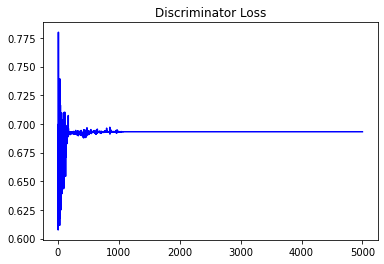

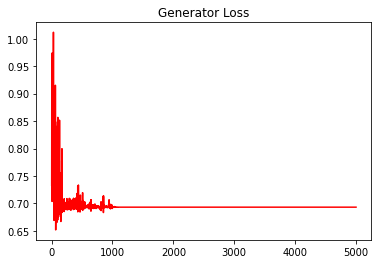

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

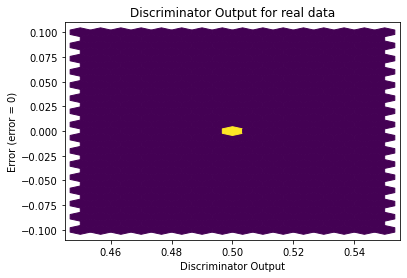

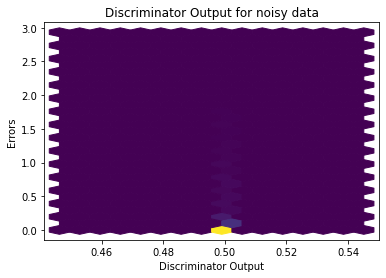

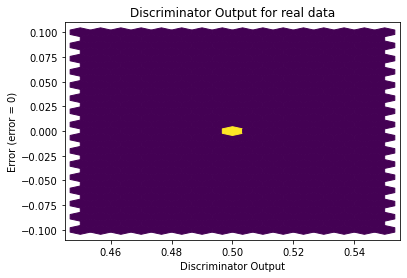

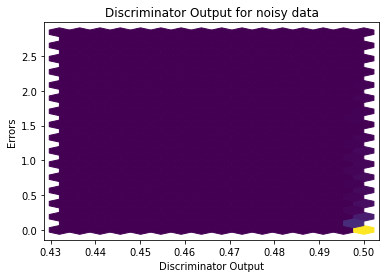

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


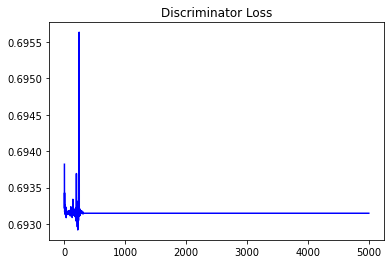

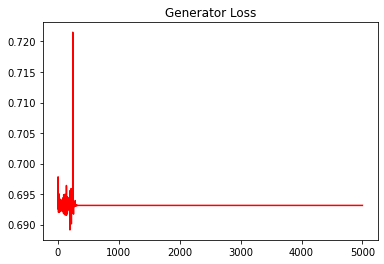

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

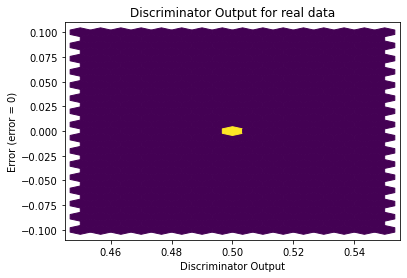

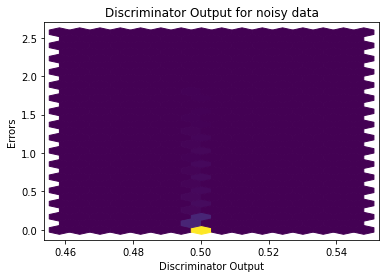

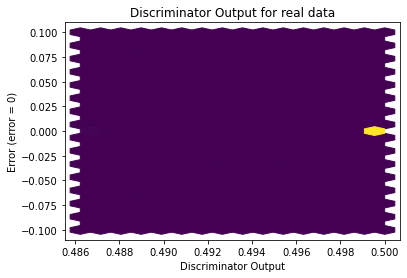

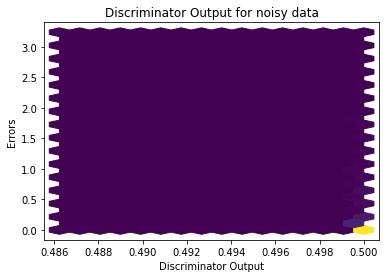

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0071]], device='cuda:0', requires_grad=True)
